In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


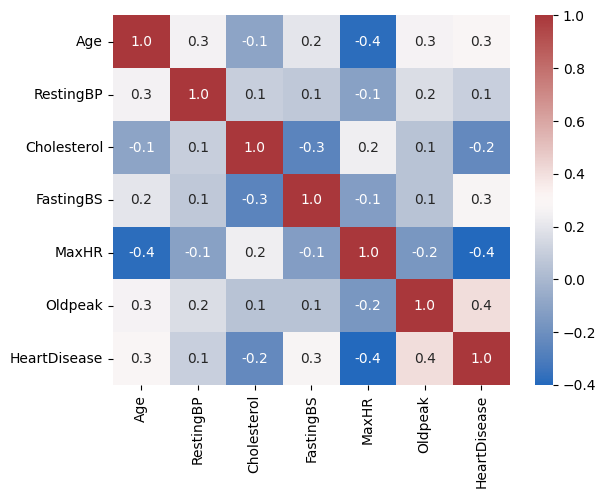

In [6]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap="vlag", annot=True, fmt="0.1f");

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category'])
results = []

for col in categorical_cols.columns:
    unique_values = categorical_cols[col].unique()
    results.append([col, len(unique_values), unique_values])

pd.DataFrame(results, columns=['column_name', 'count', 'unique_values'])

,column_name,count,unique_values
0,Sex,2,"[M, F]"
1,ChestPainType,4,"[ATA, NAP, ASY, TA]"
2,RestingECG,3,"[Normal, ST, LVH]"
3,ExerciseAngina,2,"[N, Y]"
4,ST_Slope,3,"[Up, Flat, Down]"


In [8]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.00,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.00,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.00,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.50,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.00,0,True,False,True,False,True,False,False,False,True


In [9]:
X = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
lr_params = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

knn_params = {"n_neighbors": range(2, 50)}

nb_params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

svc_params = {'C': [0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [0.1, 0.5, 1, 5, 10, 50, 100]}

tree_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [10, 20, 30, None],
             "min_samples_split": [5, 10, 15, 20],
             "n_estimators": [100, 200, 300]}

xgboost_params = {"learning_rate": [0.01, 0.1, 0.2],
                  "max_depth": [3, 5, 8],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.2],
                   "n_estimators": [100, 200, 300],
                   "colsample_bytree": [0.7, 1]}

gb_params = {'learning_rate': [0.01, 0.1, 0.2], 
             'n_estimators': [100, 200, 300], 
             'max_depth': [3, 5, 8]}

classifiers = [('LR', LogisticRegression(), lr_params),
               ('KNN', KNeighborsClassifier(), knn_params),
               ("NB", GaussianNB(), nb_params),
               ("SVC", SVC(), svc_params),
               ("Decision Tree", DecisionTreeClassifier(), tree_params),
               ("RF", RandomForestClassifier(verbose=False), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(verbose=-1), lightgbm_params),
               ("GB", GradientBoostingClassifier(), gb_params)]


def hyperparameter_tuning(X_train, y_train, cv=5, scoring="accuracy"):
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
    
        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X_train, y_train)
        best_model = classifier.set_params(**gs_best.best_params_)
    
        cv_results = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        
        best_models[name] = best_model
    return best_models

models = hyperparameter_tuning(X_train, y_train)

########## LR ##########
accuracy: 0.8523
LR best params: {'C': 0.1}

########## KNN ##########
accuracy: 0.868
KNN best params: {'n_neighbors': 24}

########## NB ##########
accuracy: 0.8583
NB best params: {'var_smoothing': 1e-09}

########## SVC ##########
accuracy: 0.8547
SVC best params: {'C': 0.5, 'gamma': 0.1}

########## Decision Tree ##########
accuracy: 0.8414
Decision Tree best params: {'max_depth': 3, 'min_samples_split': 27}

########## RF ##########
accuracy: 0.8668
RF best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

########## XGBoost ##########
accuracy: 0.8741
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}

########## LightGBM ##########
accuracy: 0.8644
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 300}

########## GB ##########
accuracy: 0.8668
GB best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}



,Accuracy,F1 Score,Precision,Recall,ROC AUC
LR,0.92,0.93,0.94,0.92,0.96
KNN,0.92,0.93,0.96,0.90,0.97
NB,0.91,0.92,0.96,0.88,0.97
SVC,0.90,0.91,0.90,0.92,0.90
Decision Tree,0.82,0.83,0.85,0.80,0.89
RF,0.91,0.92,0.92,0.92,0.95
XGBoost,0.89,0.90,0.90,0.90,0.95
LightGBM,0.88,0.89,0.88,0.90,0.93
GB,0.90,0.91,0.90,0.92,0.96


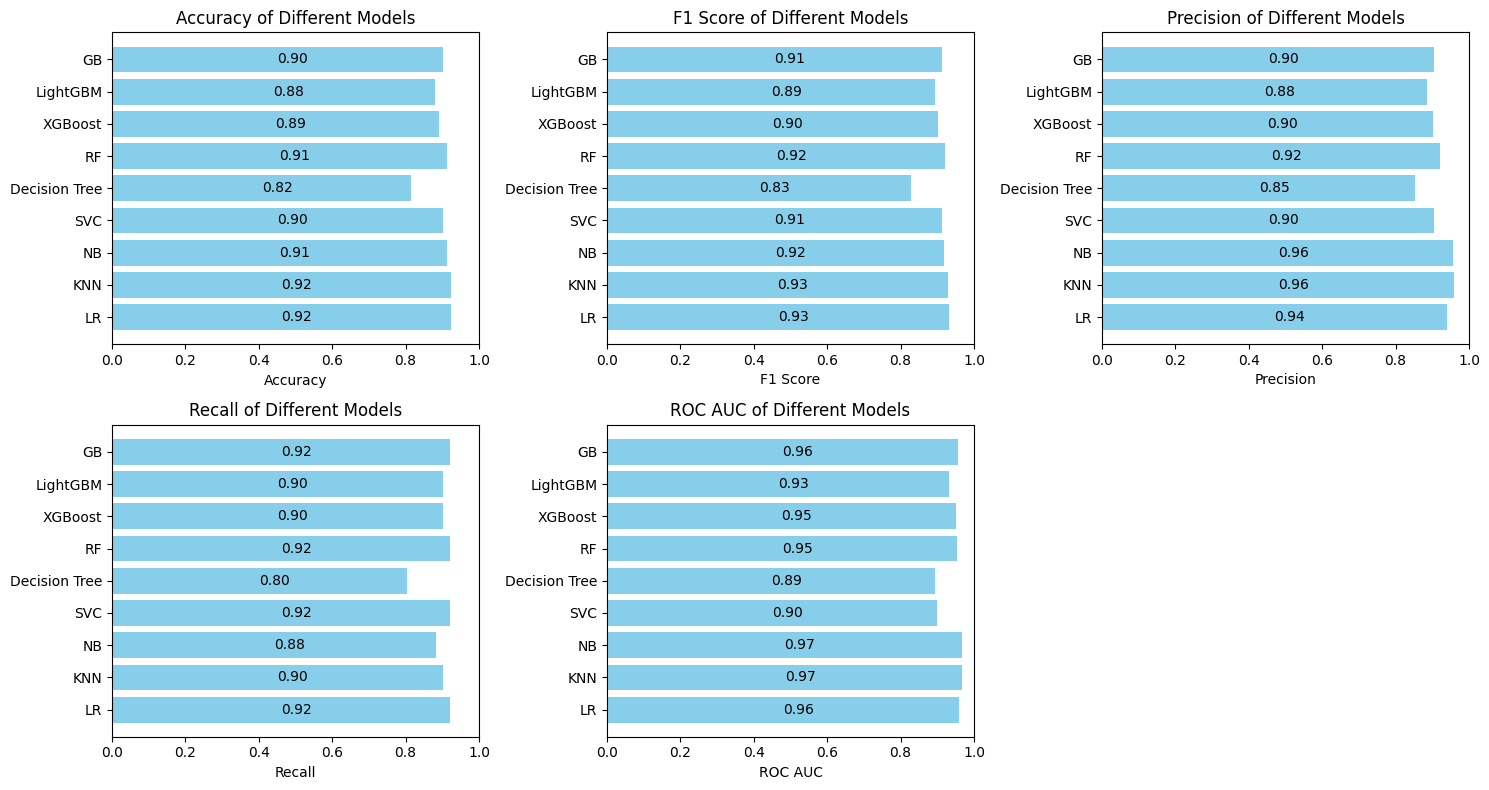

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score)

def get_metrics(best_models, X_train, y_train, X_test, y_test):
    metrics = {}
    for name, model in best_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = y_pred 
        
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        metrics[name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC AUC': roc_auc
        }
    return pd.DataFrame(metrics).T  # Транспонируем для удобства

metrics_df = get_metrics(models, X_train, y_train, X_test, y_test)
display(metrics_df)


plt.figure(figsize=(15, 8))

# Подграфик для всех метрик
for i, metric in enumerate(metrics_df.columns):
    plt.subplot(2, 3, i + 1)
    bars = plt.barh(metrics_df.index, metrics_df[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'{metric} of Different Models')
    plt.xlim(0, 1)

    # Подпись значений на графиках
    for bar in bars:
        plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.2f}', va='center')

plt.tight_layout()
plt.show()

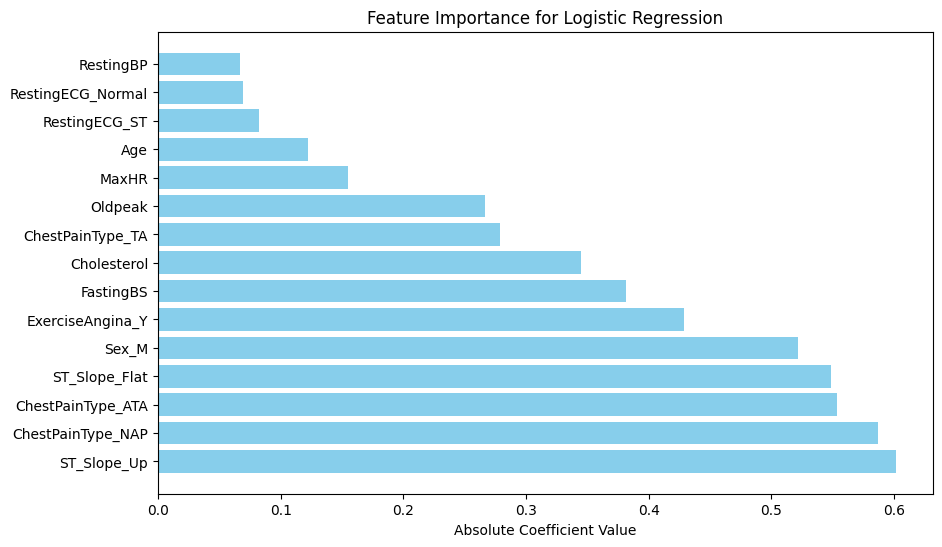

In [18]:
from joblib import dump

final_model = models['LR']
final_model.fit(X_train, y_train)

dump(final_model, 'heart_model.pkl') 

coefficients = final_model.coef_[0]
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficient': coefficients})

importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Logistic Regression')
plt.show()